In [41]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [5]:
# Read from the dataset and display the first five entries
heart_df = pd.read_csv(r'D:\Project101\Heart Disease\heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Obtain a quick brief of the dataframe
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Obtain summary statistics of the numeric entries
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


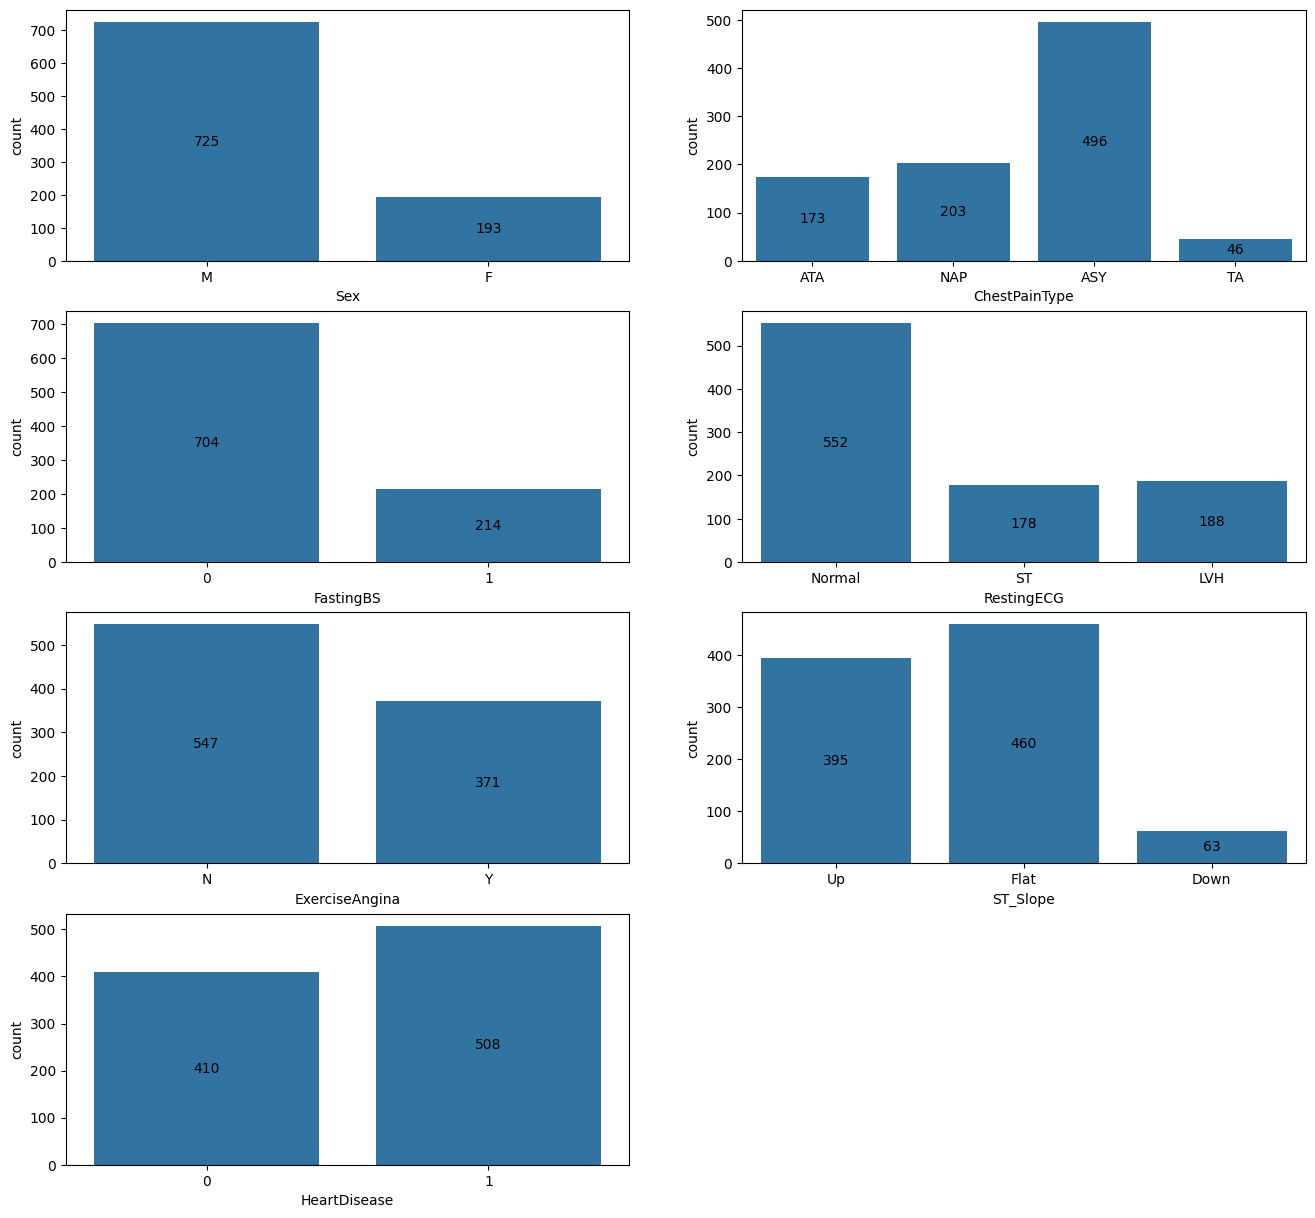

In [12]:
# Obtain summary for the categorical columns
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16, 15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart_df[col], ax=ax)
    # Add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

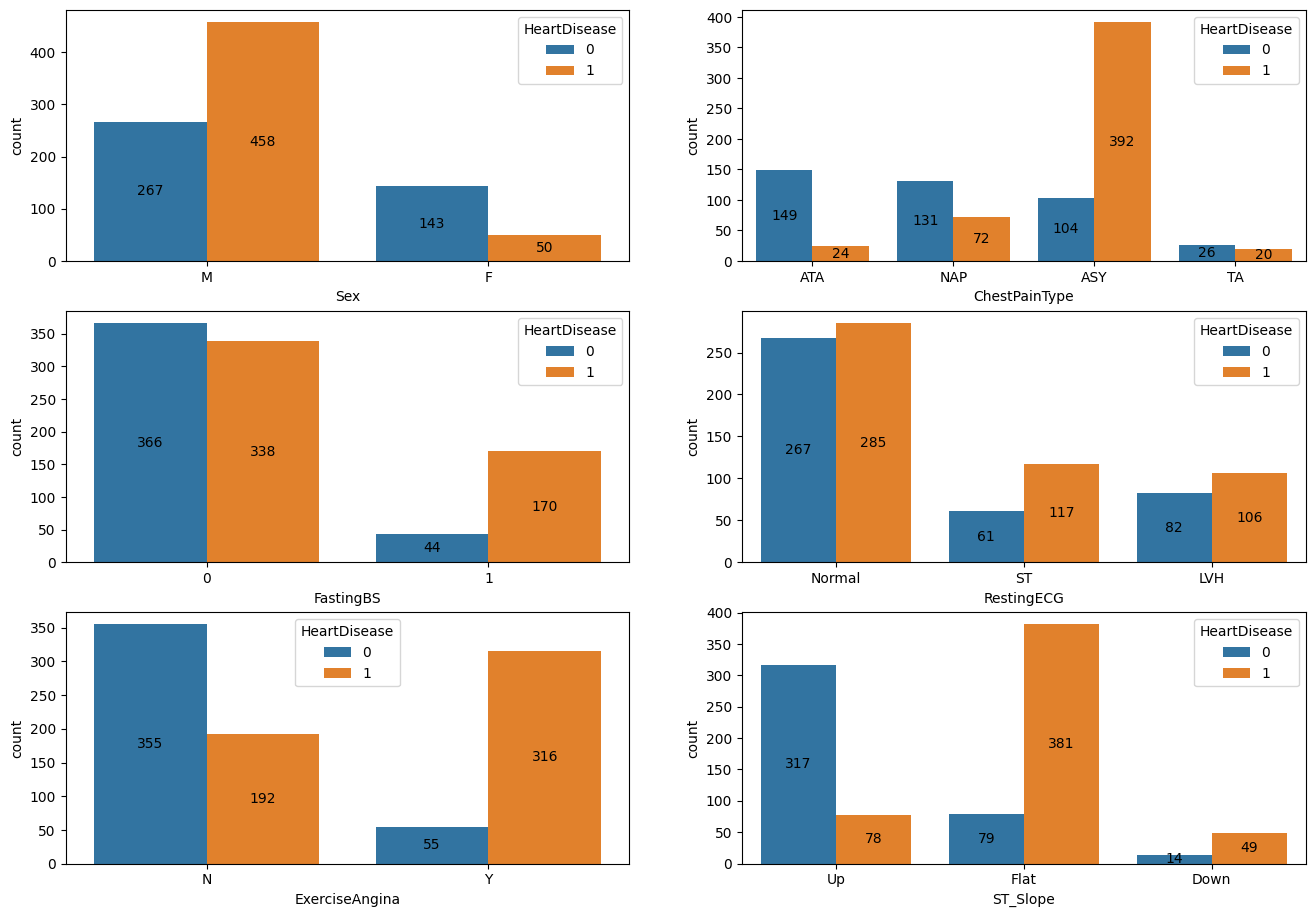

In [14]:
# Asess how categorical variables relate to predictor variable
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    #Group by HeartDisease
    sns.countplot(x=heart_df[col], hue=heart_df["HeartDisease"], ax=ax)
    # Add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
        

In [17]:
# Data cleaning (Use .info to check how many instances blood pressure, cholestrol is equal to zero)
heart_df[heart_df['RestingBP'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


In [20]:
heart_df[heart_df['Cholesterol'] ==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [25]:
# Make a copy of the data frame to avoid impacting the initial dataframe incase of a mistake
df_clean = heart_df.copy()

In [28]:
# Data cleaning: Remove the zero cholestrol entry and replace RestingBP with zeros with the median(separated in with heart disease and without heart disease)
df_clean = df_clean[df_clean["RestingBP"] != 0]

heartdisease_mask = df_clean["HeartDisease"]==0

cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

In [30]:
# Check if data is cleaned as intended
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [33]:
# Asess to see which features to use for the model by turning into numerical variable
df_clean = pd.get_dummies(df_clean, drop_first = True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


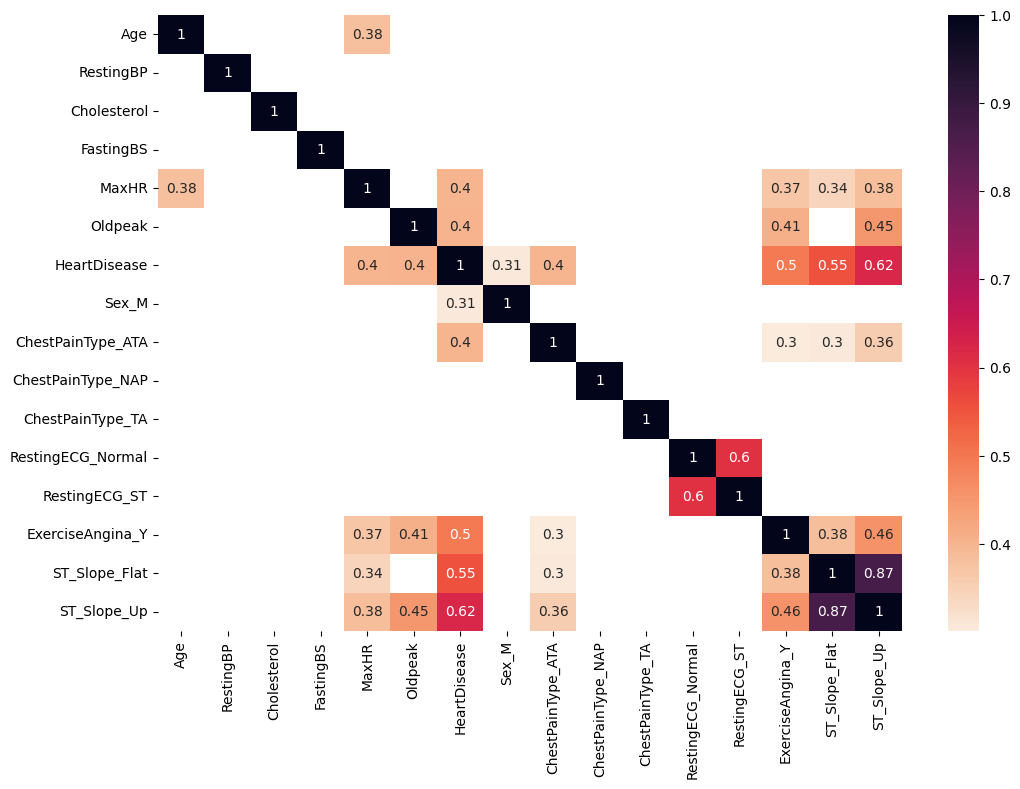

In [35]:
# Now we calculate the pearson correlation
correlations = abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.30], annot=True, cmap="rocket_r")
plt.show()

In [46]:
# Building classifier
#splitting train/ test sets
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state =417)

features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}")

The k-NN classifier trained on MaxHR and with k = 3 has an accuracy of 55.07
The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 58.70
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 61.59
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 55.07


In [48]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 83.33


In [58]:
# Hyper parameter optimization
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state =417)

features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_train_scaled

array([[0.78169014, 0.42682927, 0.        , 0.        , 0.        ,
        1.        ],
       [0.46478873, 0.42682927, 1.        , 1.        , 1.        ,
        0.        ],
       [0.71126761, 0.48780488, 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.26056338, 0.51219512, 1.        , 1.        , 0.        ,
        1.        ],
       [0.15492958, 0.19512195, 1.        , 0.        , 0.        ,
        1.        ],
       [0.59859155, 0.63414634, 1.        , 0.        , 1.        ,
        0.        ]], shape=(779, 6))

In [59]:
grid_params ={"n_neighbors": range(1, 20), "metric": ["minkowski", "manhattan"]
             }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [60]:
knn_grid.best_score_*100, knn_grid.best_params_

(np.float64(84.07692307692308), {'metric': 'minkowski', 'n_neighbors': 18})

In [61]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100:.2f}")

Model Accuracy on test set: 82.61


In [63]:
# Checking data distribution since test was better than training results
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64


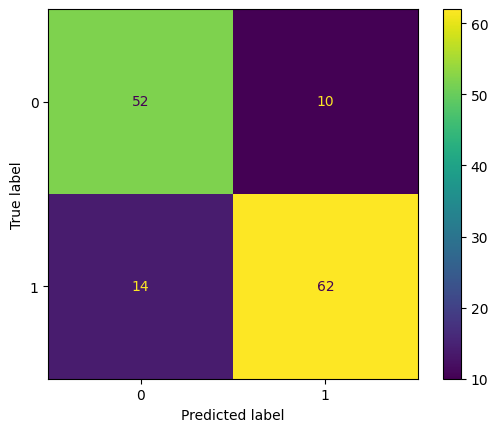

In [64]:
# Use confusion matrix to see values that were predicted correctly vs values predicted incorrectly
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()